## Imports

In [103]:
import dynamiqs as dq
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import jax.numpy as jnp

## 1. Simulate the dynamics of cat qubits at the effective Hamiltonian level.

In Tutorial 1, we have introduced that we can dissipatively stabilize a cat qubit by coupling a memory mode  that will store our cat qubit to a lossy buffer mode with a specific interaction that exchanges two photons of the memory mode with one photon in the buffer mode.

For this, consider the Lindblad master equation:

$$\frac{d \hat{\rho}}{dt} = \mathcal{L}[\hat{\rho}] = -i \left[\hat{H}, \hat{\rho}\right] + \kappa_b \mathcal{D}(\hat{b})[\hat{\rho}]$$

The Hamiltonian of the system is given by
```math
\begin{aligned}
\hat{H} &= \hat{H}_{\mathrm{2ph}} + \hat{H}_d,\qquad \mathrm{with}\\
\hat{H}_{\mathrm{2ph}} &= g_2 {{}\hat{a}^\dagger}^2 \hat{b} + g_2^* \hat{a}^2 \hat{b}^\dagger,\\
\hat{H}_d &= \epsilon_d^* \hat{b} + \epsilon_d \hat{b}^\dagger.
\end{aligned}
```

Here, $\hat{H}_{\mathrm{2ph}}$ is the two-photon exchange Hamiltonian and $\hat{H}_d$ is the buffer drive Hamiltonian.

**Task 1.1: Getting started with `dynamiqs`**

Using `dynamiqs`, simulate the time-evolution of this system with the following parameters:

```math
\begin{aligned}
g_2 = 1.0, 
\epsilon_d = -4, 
\kappa_b = 10
\end{aligned}
```

(For now, we pretend that the parameters are without dimensions)

Use an initial state $\lvert \psi_0 \rangle$ in which both the buffer and the memory are in the vacuum. Use a Hilbert-space truncation of $n_a = 20$ and $n_b = 5$ (number of Fock-states in mode a and mode b, respectively) to begin with. You can play with a different Hilbert-space truncation.

Simulate the dynamics for a time $T=4$. 

Plot the wigner function of mode a (as a GIF or as a mosaic plot).

Also plot the expectation value of the number of photons, as well as the photon number parity in the memory mode.

In [ ]:
# Define parameters
g2 = 1.0
epsilon_d = -4
kappa_b = 10
kappa_2 = 4 * (jnp.abs(g2)**2) / kappa_b # Unused
T = 4.0  # Simulation time
na = 20  # Hilbert space truncation for memory mode
nb = 5   # Hilbert space truncation for buffer mode

# Define annihilation operators correctly for both modes
a, b = dq.destroy(na, nb)

# Define initial state: vacuum state for both modes
psi0 = dq.tensor(dq.fock(na, 0), dq.fock(nb, 0))

# Define the 2ph Hamiltonian
H_2PH = g2 * (a @ a @ b.dag() + a.dag() @ a.dag() @ b)

# Define the Driving Hamiltonian
H_D = epsilon_d * (b + b.dag())

# Define Hamiltonian (using g2 and epsilon_d)
H = g2 * (a @ a @ b.dag() + a.dag() @ a.dag() @ b) + epsilon_d * (b + b.dag())

# Define dissipation (buffer decay)
jump_ops = [jnp.sqrt(kappa_b) * b]

# Define time evolution
tsave = jnp.linspace(0, T, 100)

# Solve the master equation
res = dq.mesolve(H, jump_ops, psi0, tsave)

# Extract the memory mode (mode_a) by partial tracing
rho_a = dq.ptrace(res.states,0)  # Keep only mode a


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.2% ◆ elapsed 2.66ms ◆ remaining 0.00ms

|██████████| 100.0% ◆ elapsed 376.78ms ◆ remaining 0.00ms  
100%|██████████| 48/48 [00:02<00:00, 17.88it/s]


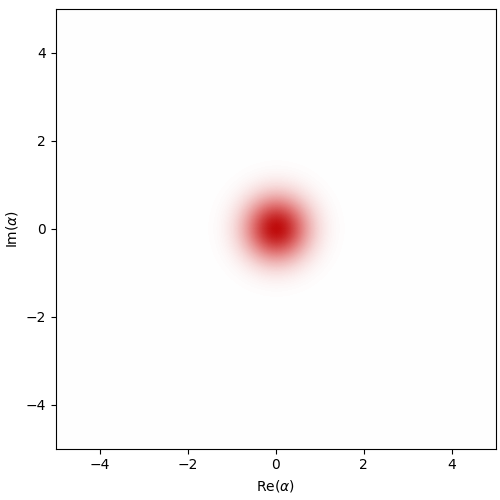

|          |   0.2% ◆ elapsed 4.45ms ◆ remaining 0.00ms

In [100]:
# Plot Wigner function of mode a
dq.plot.wigner_gif(rho_a, gif_duration = 2, fps=24)

In [101]:
# Compute Expectation Values for Mode a
exp_photon_a = dq.expect(dq.number(na), rho_a)  # Photon number expectation
exp_parity_a = dq.expect(dq.parity(na), rho_a)  # Photon number parity

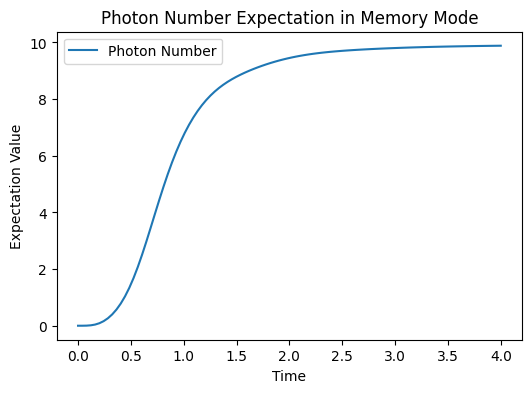

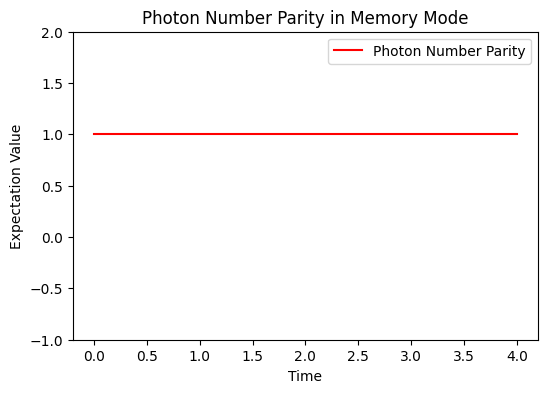

In [ ]:
# Plot Photon Number Expectation
plt.figure(figsize=(6, 4))
plt.plot(tsave, exp_photon_a, label="Photon Number")
plt.xlabel("Time")
plt.ylabel("Expectation Value")
plt.legend()
plt.title("Photon Number Expectation in Memory Mode")
plt.show()

# Plot Photon Number Parity
plt.figure(figsize=(6, 4))
plt.plot(tsave, exp_parity_a, label="Photon Number Parity", color="red")
plt.xlabel("Time")
plt.ylabel("Expectation Value")
plt.legend()
plt.title("Photon Number Parity in Memory Mode")

# Set y-axis limits (optional, adjust as needed)
plt.ylim([- 1, 2])

plt.show()